In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay, accuracy_score, classification_report, precision_score, recall_score, f1_score

In [11]:
iris = datasets.load_iris()

In [12]:
df = pd.DataFrame(data=iris.data,columns = iris.feature_names)

In [13]:
df['species'] = iris.target_names[iris.target]

In [14]:
df = df.rename(columns = {
    "sepal length (cm)": "sepal_length",
    "sepal width (cm)": "sepal_width",
    "petal length (cm)": "petal_length",
    "petal width (cm)": "petal_width"
})

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

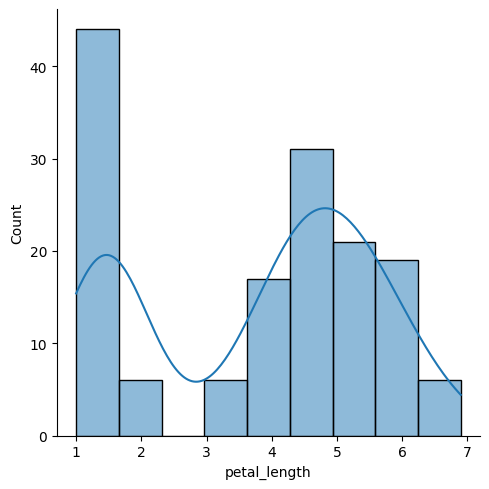

In [18]:
sns.displot(data=df['petal_length'], kde=True)

<Axes: ylabel='petal_length'>

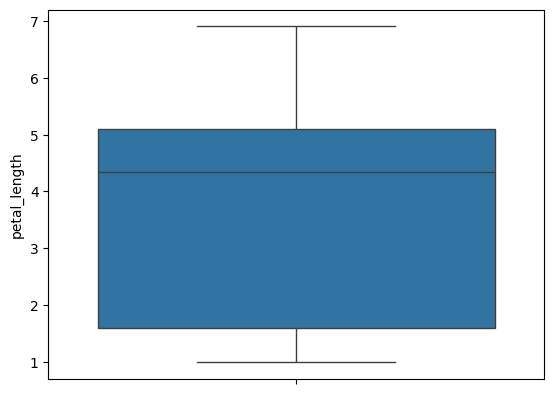

In [19]:
sns.boxplot(data=df['petal_length'])

In [20]:
def fun1(value):
    return 0 if value == "setosa" else 1 if value == "versicolor" else 2

In [21]:
df["species"] = df["species"].apply(fun1)

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


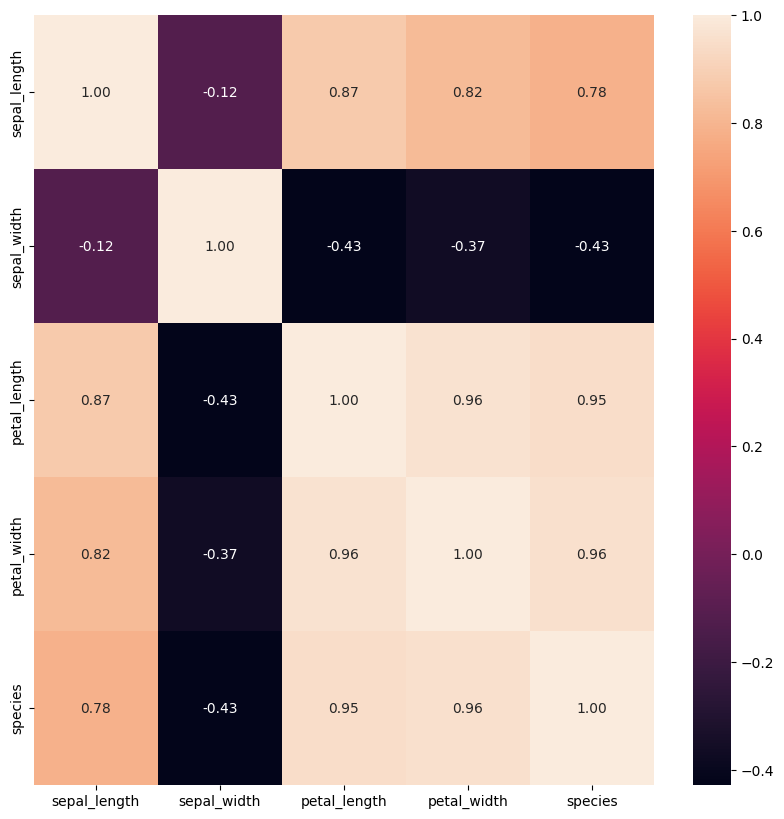

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f")
plt.show()

In [24]:
X = df.drop(["species"], axis=1)
y = df["species"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
model = GaussianNB().fit(X_train, y_train)

In [27]:
y_pred = model.predict(X_test)

In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  0  0]
 [ 0 12  1]
 [ 0  3 13]]


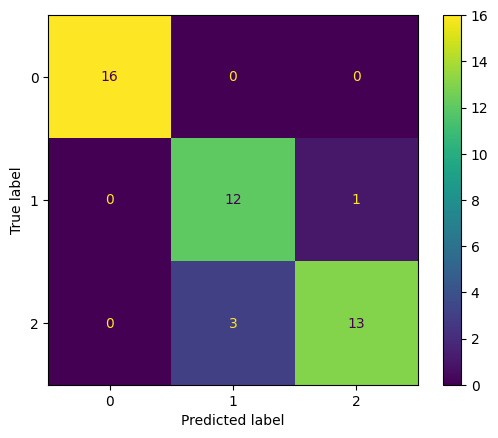

In [29]:
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.80      0.92      0.86        13
           2       0.93      0.81      0.87        16

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



In [31]:
print(f"Accuracy score is {accuracy_score(y_test, y_pred)}")

Accuracy score is 0.9111111111111111


In [32]:
print(f"Error rate is {1 - accuracy_score(y_test, y_pred)}")

Error rate is 0.0888888888888889


In [33]:
print(f"Precision score is {precision_score(y_test, y_pred, average='macro')}")

Precision score is 0.9095238095238095


In [34]:
print(f"Recall score is {recall_score(y_test, y_pred, average='macro')}")

Recall score is 0.9118589743589745
